In [1]:
# ! pip install matplotlib==3.1.1
# !pip uninstall matplotlib

https://towardsdatascience.com/unsupervised-anomaly-detection-on-time-series-9bcee10ab473

In [2]:
# ! pip install plotly
# !pip install xlrd

In [3]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# # import altair as alt
# from IPython.display import HTML
# import math
# import time
# from datetime import datetime
# from sklearn.ensemble import IsolationForest
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from sklearn.preprocessing import MinMaxScaler
# import plotly.graph_objs as go
# import matplotlib.pyplot as plt
# from matplotlib import pyplot

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import altair as alt
from IPython.display import HTML
import math
import time
from datetime import datetime
from sklearn.ensemble import IsolationForest
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
# import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf

In [5]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [6]:
from numpy.random import seed

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [8]:
# !pip install fbprophet


# !pip install pyod
# !pip install --upgrade pyod  # or update if needed
# !pip install --pre pyod      # or include pre-release version for new features

# REDES NEURAIS

In [9]:
#criando dicionário com todos os produtos e serviços

nuvem = {
    'Amazon Virtual Private Cloud':['SAE1-DataTransfer-In-Bytes','SAE1-USW2-AWS-In-Bytes','SAE1-USE1-AWS-In-Bytes'],
    'EC2 - Other':['SAE1-DataTransfer-Regional-Bytes','SAE1-EU-AWS-In-Bytes','SAE1-NatGateway-Bytes'],
    'Amazon Simple Storage Service':['Requests-Tier1','Requests-Tier2','SAE1-USE1-AWS-Out-Bytes']
}

In [10]:
# # modifica uma serie temporal tornando-a
# # um problema de aprendizado supervisionado
# def timeseries_to_supervised(series, look_back=1):
#   x = series[:-look_back]
#   y = np.array(series[look_back:], copy=True)
#   return x,y

# def normalize(train, test):
#     d_max = np.max(train)
#     d_min = np.min(train)
#     return ((train - d_min) / (d_max-d_min)), ((test - d_min) / (d_max-d_min))

In [11]:
# look_back = 1

# n_train, n_test = normalize(train, test)

# x_train, y_train = timeseries_to_supervised(n_train, look_back)
# x_test, y_test = timeseries_to_supervised(n_test, look_back)

# #mostrando exemplos
# print(x_train[:4])
# print(y_train[:4])
# print("Dados treinamento após conversao: ", x_train.shape)
# print("Dados teste após conversao: ", x_test.shape)

## MLP

In [12]:
def ddo_mlp(produto, servico, epochs=100, limite=0.2, look_back = 1, neuronios = 100, activation='relu', n_input = 1, batch_size=32, dropout=0.2, optimizer='adam', loss='mse'):
    
    filename = "Series\serie_"+produto+"_"+servico+".csv"
    print(filename)
    data = pd.read_csv(filename,index_col=0)  
    
    
    x = data['qnt'][:-look_back]
    y = np.array(data['qnt'][look_back:], copy=True)
    
    
    
    
    seed(2)
    tf.random.set_random_seed(2)
    
    # Arquitetura do modelo
    model = Sequential()
    model.add(Dense(neuronios, activation=activation, input_shape=(n_input, )))
    model.add(Dropout(dropout))
    model.add(Dense(50, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.summary()
    
    
#     model.compile(optimizer=optimizer, loss=loss,metrics=['mae'])
#     model.fit_generator(generator,epochs=epochs, verbose=1)

    model.compile(loss=loss, 
                optimizer=optimizer,
                metrics=['mae'])
    
    histMLP = model.fit(x, y,  
                      batch_size=batch_size, epochs=epochs, 
                      verbose=1)
    
    loss_per_epoch = model.history.history['loss']
    plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
    plt.title('Loss')
    

        
    
    # make predictions
    
    values_predicted = model.predict(x)
    
#     print(values_predicted)
    predicted = []
    
    for value in values_predicted:
        for value2 in value:
            predicted.append(value2)
    
    predicted.insert(0,data['qnt'][0])
#     print(data)
#     print(predicted)
    
    
    data['predicted'] = predicted
    

    
    data = data.rename(columns={"inicio": "data"})
#     data['predicted'] = train_predictions
    data['diff'] = abs(data['qnt']- data['predicted'])
    
    outliers_mlp = data[data['diff']>limite]
    

    
    
    #Visualizando os gráficos
    plt.rcParams['figure.figsize'] = [6,4]
    fig, ax = plt.subplots()
    ax.plot(pd.to_datetime(data['data']), data['qnt'], label='Dados')
    #rotacionando as datas
    #fig.autofmt_xdate(rotation=90)
    ax.plot(pd.to_datetime(data['data']), data['predicted'], label='MLP')
    # marcando as anomalias em vermelho
    ax.plot(pd.to_datetime(outliers_mlp['data']), outliers_mlp['qnt'], 'rX', markersize=7,label='Pontos de Interesse')
    ax.set(xlabel='data', ylabel='qnt',
#            title=produto+': '+servico
          )
    #removendo as datas do gráfico
#     plt.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
    #ax.grid()
    ax.legend()
    
    plt.suptitle('MLP',y=1.05,fontsize=13)
    plt.title('Produto: '+produto+'\nServiço: '+servico,fontsize=10, loc='center')
        
    # Nomes dos eixos
    plt.xlabel('Data')
    plt.ylabel('Consumo Normalizado')
    
    #rotacionando os textos do eixo x
    fig.autofmt_xdate()
    
    #Salvando a figura
    filename = "Figuras\\"+produto+"_"+servico+"_MLP.png"
    plt.savefig(filename)
    
    plt.show()
    
    
    outliers_mlp = outliers_mlp.set_index('data')
    outliers_mlp['MLP'] = 1 
    outliers_mlp = outliers_mlp.drop(columns=['qnt', 'predicted', 'diff'])
# #     data = data.drop(columns='')   


    #gravando arquivo csv
    filename = "DdO\DdO_MLP_"+produto+"_"+servico+".csv"
    outliers_mlp.to_csv(filename,index = True, header=True)
    
    return outliers_mlp

In [13]:
# ddo_mlp('Amazon Virtual Private Cloud', 'SAE1-DataTransfer-In-Bytes',2)

===  Amazon Virtual Private Cloud  /  SAE1-DataTransfer-In-Bytes  ====
Series\serie_Amazon Virtual Private Cloud_SAE1-DataTransfer-In-Bytes.csv
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,301
Trainab

303/303 [==============================] - 0s 36us/step - loss: 0.0037 - mae: 0.0107
Epoch 67/100
303/303 [==============================] - 0s 56us/step - loss: 0.0037 - mae: 0.0125
Epoch 68/100
303/303 [==============================] - 0s 36us/step - loss: 0.0037 - mae: 0.0109
Epoch 69/100
303/303 [==============================] - 0s 49us/step - loss: 0.0037 - mae: 0.0103
Epoch 70/100
303/303 [==============================] - 0s 39us/step - loss: 0.0038 - mae: 0.0120
Epoch 71/100
303/303 [==============================] - 0s 43us/step - loss: 0.0037 - mae: 0.0116
Epoch 72/100
303/303 [==============================] - 0s 43us/step - loss: 0.0036 - mae: 0.0107
Epoch 73/100
303/303 [==============================] - 0s 43us/step - loss: 0.0037 - mae: 0.0106
Epoch 74/100
303/303 [==============================] - 0s 43us/step - loss: 0.0037 - mae: 0.0109
Epoch 75/100
303/303 [==============================] - 0s 43us/step - loss: 0.0037 - mae: 0.0115
Epoch 76/100
303/303 [===========

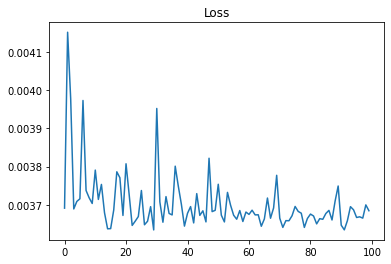

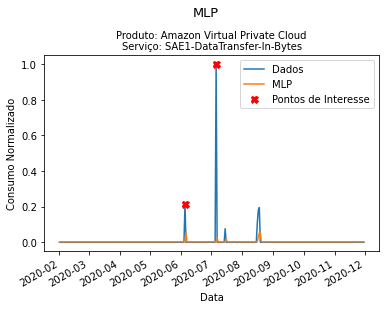

===  Amazon Virtual Private Cloud  /  SAE1-USW2-AWS-In-Bytes  ====
Series\serie_Amazon Virtual Private Cloud_SAE1-USW2-AWS-In-Bytes.csv
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               200       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
________________________________________________

303/303 [==============================] - 0s 46us/step - loss: 0.0326 - mae: 0.1373
Epoch 73/100
303/303 [==============================] - 0s 46us/step - loss: 0.0329 - mae: 0.1373
Epoch 74/100
303/303 [==============================] - 0s 39us/step - loss: 0.0334 - mae: 0.1405
Epoch 75/100
303/303 [==============================] - 0s 43us/step - loss: 0.0333 - mae: 0.1373
Epoch 76/100
303/303 [==============================] - 0s 39us/step - loss: 0.0326 - mae: 0.1353
Epoch 77/100
303/303 [==============================] - 0s 39us/step - loss: 0.0323 - mae: 0.1360
Epoch 78/100
303/303 [==============================] - 0s 46us/step - loss: 0.0318 - mae: 0.1356
Epoch 79/100
303/303 [==============================] - 0s 46us/step - loss: 0.0331 - mae: 0.1381
Epoch 80/100
303/303 [==============================] - 0s 36us/step - loss: 0.0320 - mae: 0.1367
Epoch 81/100
303/303 [==============================] - 0s 46us/step - loss: 0.0329 - mae: 0.1347
Epoch 82/100
303/303 [===========

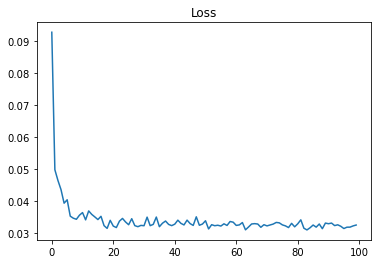

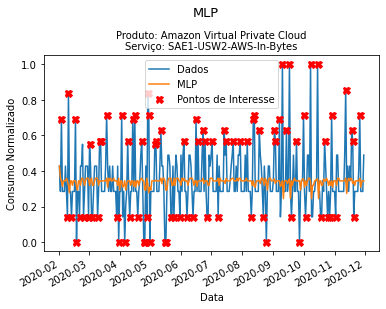

===  Amazon Virtual Private Cloud  /  SAE1-USE1-AWS-In-Bytes  ====
Series\serie_Amazon Virtual Private Cloud_SAE1-USE1-AWS-In-Bytes.csv
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
________________________________________________

297/297 [==============================] - 0s 71us/step - loss: 0.0128 - mae: 0.0669
Epoch 73/100
297/297 [==============================] - 0s 111us/step - loss: 0.0134 - mae: 0.0663
Epoch 74/100
297/297 [==============================] - 0s 64us/step - loss: 0.0128 - mae: 0.0640
Epoch 75/100
297/297 [==============================] - 0s 50us/step - loss: 0.0130 - mae: 0.0662
Epoch 76/100
297/297 [==============================] - 0s 97us/step - loss: 0.0134 - mae: 0.0670
Epoch 77/100
297/297 [==============================] - 0s 60us/step - loss: 0.0134 - mae: 0.0658
Epoch 78/100
297/297 [==============================] - 0s 74us/step - loss: 0.0128 - mae: 0.0644
Epoch 79/100
297/297 [==============================] - 0s 54us/step - loss: 0.0134 - mae: 0.0659
Epoch 80/100
297/297 [==============================] - 0s 54us/step - loss: 0.0137 - mae: 0.0663
Epoch 81/100
297/297 [==============================] - 0s 81us/step - loss: 0.0137 - mae: 0.0675
Epoch 82/100
297/297 [==========

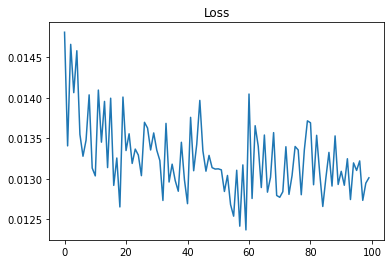

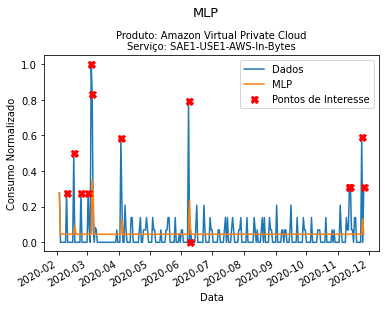

===  EC2 - Other  /  SAE1-DataTransfer-Regional-Bytes  ====
Series\serie_EC2 - Other_SAE1-DataTransfer-Regional-Bytes.csv
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
______________________________________________________________

Epoch 73/100
268/268 [==============================] - 0s 60us/step - loss: 0.0047 - mae: 0.0294
Epoch 74/100
268/268 [==============================] - 0s 67us/step - loss: 0.0055 - mae: 0.0319
Epoch 75/100
268/268 [==============================] - 0s 67us/step - loss: 0.0047 - mae: 0.0350
Epoch 76/100
268/268 [==============================] - 0s 67us/step - loss: 0.0055 - mae: 0.0341
Epoch 77/100
268/268 [==============================] - 0s 52us/step - loss: 0.0057 - mae: 0.0345
Epoch 78/100
268/268 [==============================] - 0s 65us/step - loss: 0.0048 - mae: 0.0294
Epoch 79/100
268/268 [==============================] - 0s 48us/step - loss: 0.0047 - mae: 0.0321
Epoch 80/100
268/268 [==============================] - 0s 56us/step - loss: 0.0052 - mae: 0.0336
Epoch 81/100
268/268 [==============================] - 0s 52us/step - loss: 0.0058 - mae: 0.0347
Epoch 82/100
268/268 [==============================] - 0s 56us/step - loss: 0.0057 - mae: 0.0388
Epoch 83/100
268/268

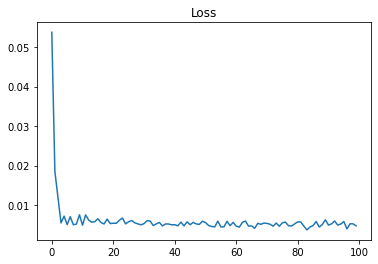

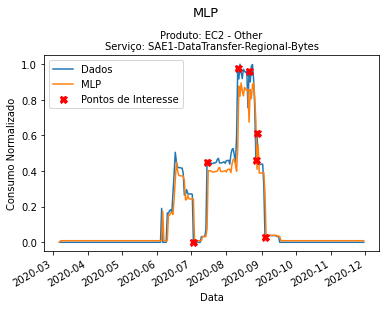

===  EC2 - Other  /  SAE1-EU-AWS-In-Bytes  ====
Series\serie_EC2 - Other_SAE1-EU-AWS-In-Bytes.csv
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
269/269 

269/269 [==============================] - 0s 56us/step - loss: 0.0152 - mae: 0.0728
Epoch 74/100
269/269 [==============================] - 0s 70us/step - loss: 0.0147 - mae: 0.0689
Epoch 75/100
269/269 [==============================] - 0s 48us/step - loss: 0.0154 - mae: 0.0733
Epoch 76/100
269/269 [==============================] - 0s 44us/step - loss: 0.0140 - mae: 0.0674
Epoch 77/100
269/269 [==============================] - 0s 56us/step - loss: 0.0150 - mae: 0.0683
Epoch 78/100
269/269 [==============================] - 0s 52us/step - loss: 0.0141 - mae: 0.0706
Epoch 79/100
269/269 [==============================] - 0s 56us/step - loss: 0.0125 - mae: 0.0638
Epoch 80/100
269/269 [==============================] - 0s 44us/step - loss: 0.0144 - mae: 0.0660
Epoch 81/100
269/269 [==============================] - 0s 56us/step - loss: 0.0142 - mae: 0.0675
Epoch 82/100
269/269 [==============================] - 0s 48us/step - loss: 0.0146 - mae: 0.0693
Epoch 83/100
269/269 [===========

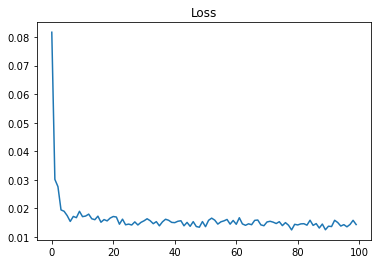

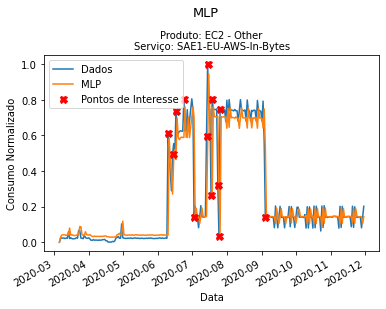

===  EC2 - Other  /  SAE1-NatGateway-Bytes  ====
Series\serie_EC2 - Other_SAE1-NatGateway-Bytes.csv
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
269/26

269/269 [==============================] - 0s 63us/step - loss: 0.0156 - mae: 0.0559
Epoch 73/100
269/269 [==============================] - 0s 56us/step - loss: 0.0137 - mae: 0.0503
Epoch 74/100
269/269 [==============================] - 0s 59us/step - loss: 0.0157 - mae: 0.0517
Epoch 75/100
269/269 [==============================] - 0s 67us/step - loss: 0.0153 - mae: 0.0614
Epoch 76/100
269/269 [==============================] - 0s 67us/step - loss: 0.0143 - mae: 0.0580
Epoch 77/100
269/269 [==============================] - 0s 67us/step - loss: 0.0146 - mae: 0.0529
Epoch 78/100
269/269 [==============================] - 0s 74us/step - loss: 0.0156 - mae: 0.0499
Epoch 79/100
269/269 [==============================] - 0s 59us/step - loss: 0.0152 - mae: 0.0546
Epoch 80/100
269/269 [==============================] - 0s 70us/step - loss: 0.0149 - mae: 0.0532
Epoch 81/100
269/269 [==============================] - 0s 63us/step - loss: 0.0158 - mae: 0.0560
Epoch 82/100
269/269 [===========

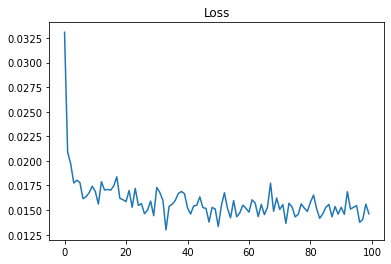

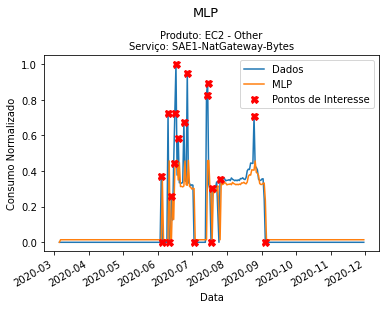

===  Amazon Simple Storage Service  /  Requests-Tier1  ====
Series\serie_Amazon Simple Storage Service_Requests-Tier1.csv
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
______________________________________________________________

Epoch 73/100
299/299 [==============================] - 0s 60us/step - loss: 0.0094 - mae: 0.0609
Epoch 74/100
299/299 [==============================] - 0s 57us/step - loss: 0.0106 - mae: 0.0617
Epoch 75/100
299/299 [==============================] - 0s 60us/step - loss: 0.0094 - mae: 0.0599
Epoch 76/100
299/299 [==============================] - 0s 60us/step - loss: 0.0112 - mae: 0.0629
Epoch 77/100
299/299 [==============================] - 0s 57us/step - loss: 0.0092 - mae: 0.0585
Epoch 78/100
299/299 [==============================] - 0s 60us/step - loss: 0.0105 - mae: 0.0606
Epoch 79/100
299/299 [==============================] - 0s 57us/step - loss: 0.0116 - mae: 0.0660
Epoch 80/100
299/299 [==============================] - 0s 70us/step - loss: 0.0114 - mae: 0.0679
Epoch 81/100
299/299 [==============================] - 0s 53us/step - loss: 0.0109 - mae: 0.0640
Epoch 82/100
299/299 [==============================] - 0s 50us/step - loss: 0.0113 - mae: 0.0631
Epoch 83/100
299/299

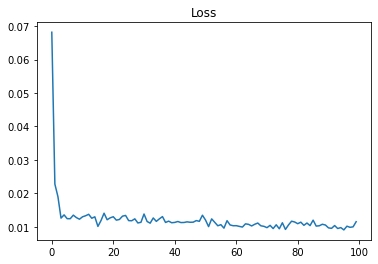

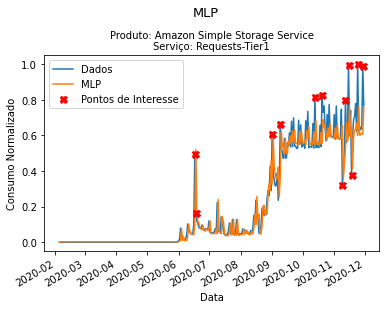

===  Amazon Simple Storage Service  /  Requests-Tier2  ====
Series\serie_Amazon Simple Storage Service_Requests-Tier2.csv
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
______________________________________________________________

Epoch 73/100
299/299 [==============================] - 0s 80us/step - loss: 0.0034 - mae: 0.0255
Epoch 74/100
299/299 [==============================] - 0s 85us/step - loss: 0.0036 - mae: 0.0240
Epoch 75/100
299/299 [==============================] - 0s 130us/step - loss: 0.0037 - mae: 0.0259
Epoch 76/100
299/299 [==============================] - 0s 67us/step - loss: 0.0035 - mae: 0.0238
Epoch 77/100
299/299 [==============================] - 0s 92us/step - loss: 0.0034 - mae: 0.0238
Epoch 78/100
299/299 [==============================] - 0s 67us/step - loss: 0.0034 - mae: 0.0243
Epoch 79/100
299/299 [==============================] - 0s 67us/step - loss: 0.0035 - mae: 0.0238
Epoch 80/100
299/299 [==============================] - 0s 80us/step - loss: 0.0036 - mae: 0.0268
Epoch 81/100
299/299 [==============================] - 0s 73us/step - loss: 0.0033 - mae: 0.0253
Epoch 82/100
299/299 [==============================] - 0s 57us/step - loss: 0.0036 - mae: 0.0256
Epoch 83/100
299/29

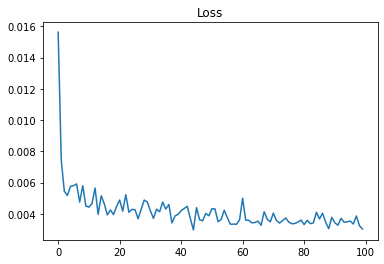

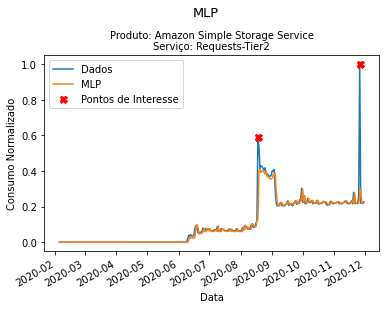

===  Amazon Simple Storage Service  /  SAE1-USE1-AWS-Out-Bytes  ====
Series\serie_Amazon Simple Storage Service_SAE1-USE1-AWS-Out-Bytes.csv
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
____________________________________________

299/299 [==============================] - 0s 67us/step - loss: 0.0085 - mae: 0.0433
Epoch 73/100
299/299 [==============================] - 0s 50us/step - loss: 0.0082 - mae: 0.0425
Epoch 74/100
299/299 [==============================] - 0s 73us/step - loss: 0.0083 - mae: 0.0474
Epoch 75/100
299/299 [==============================] - 0s 77us/step - loss: 0.0081 - mae: 0.0456
Epoch 76/100
299/299 [==============================] - 0s 60us/step - loss: 0.0080 - mae: 0.0427
Epoch 77/100
299/299 [==============================] - 0s 60us/step - loss: 0.0083 - mae: 0.0470
Epoch 78/100
299/299 [==============================] - 0s 63us/step - loss: 0.0083 - mae: 0.0462
Epoch 79/100
299/299 [==============================] - 0s 53us/step - loss: 0.0082 - mae: 0.0431
Epoch 80/100
299/299 [==============================] - 0s 50us/step - loss: 0.0084 - mae: 0.0449
Epoch 81/100
299/299 [==============================] - 0s 47us/step - loss: 0.0084 - mae: 0.0469
Epoch 82/100
299/299 [===========

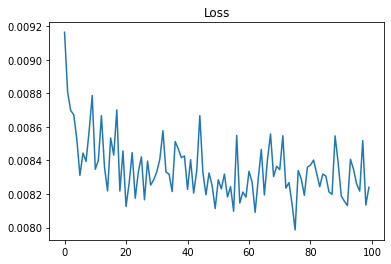

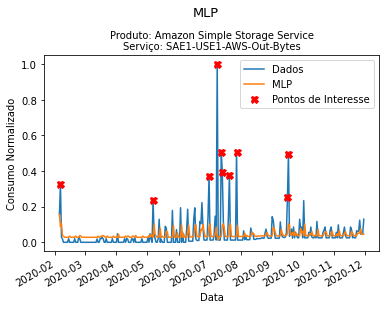

In [14]:
for key in nuvem:
    for value in nuvem[key]:
        produto = key
        servico = value
        print('=== ',produto,' / ', servico,' ====')
        ddo_mlp (produto, servico)

## LSTM

In [15]:
def ddo_lstm(produto, servico, epochs=100, neuronios = 100, activation='relu', n_input = 7, n_features = 1, batch_size=1, dropout=0.2, optimizer='adam', loss='mse', limite=0.2):
    
    filename = "Series\serie_"+produto+"_"+servico+".csv"
    print(filename)
    data = pd.read_csv(filename,index_col=0)  
    
#     data = data.rename(columns={"inicio": "inicio", "qnt": "qnt"})
       
    scaled_train = np.array(data['qnt']).reshape(-1,1)
    print(scaled_train.shape)
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
    
    
    seed(2)
    tf.random.set_random_seed(2)
    
    # Arquitetura do modelo
    model = Sequential()
#     model.add(LSTM(neuronios, activation=activation, input_shape=(n_input, n_features),stateful=True))
    model.add(LSTM(neuronios, activation=activation, input_shape=(n_input, n_features)))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.summary()
    
    
    model.compile(optimizer=optimizer, loss=loss,metrics=['mae'])
    model.fit_generator(generator,epochs=epochs, verbose=1)
    
    loss_per_epoch = model.history.history['loss']
    plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
    plt.title('Loss')
    
    first_eval_batch = scaled_train[-7:]
    
    test_predictions = []
    
    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(30):

        # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
        current_pred = model.predict(current_batch)[0]

        # predição
        test_predictions.append(current_pred) 

        # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
        
    train_predictions = model.predict(generator)
    fill = np.full((7,1), scaled_train[:7].mean())
    train_predictions = np.concatenate((fill,train_predictions))
    
    
    data = data.rename(columns={"inicio": "data"})
    data['predicted'] = train_predictions
    data['diff'] = abs(data['qnt']- data['predicted'])
    
    outliers_lstm = data[data['diff']>limite]
    
#     print(outliers_lstm)
    
#     plt.rcParams['figure.figsize'] = [8,4]
#     plt.plot(data['qnt'],linewidth=2, label = 'Teste')
#     plt.plot(data['predicted'], label = 'Rede Dinâmica')
#     plt.scatter(outliers_lstm['qnt'].index,outliers_lstm['qnt'],c='red',s=60,marker='o', label = 'Outliers')
#     plt.legend()
    
    
    #Visualizando os gráficos
    plt.rcParams['figure.figsize'] = [6,4]
    fig, ax = plt.subplots()
    ax.plot(pd.to_datetime(data['data']), data['qnt'], label='Dados')
    #rotacionando as datas
    #fig.autofmt_xdate(rotation=90)
    ax.plot(pd.to_datetime(data['data']), data['predicted'], label='LSTM')
    # marcando as anomalias em vermelho
    ax.plot(pd.to_datetime(outliers_lstm['data']), outliers_lstm['qnt'], 'rX', markersize=7,label='Pontos de Interesse')
    ax.set(xlabel='data', ylabel='qnt',
#            title=produto+': '+servico
          )
    #removendo as datas do gráfico
#     plt.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
    #ax.grid()
    ax.legend()
    
    plt.suptitle('LSTM',y=1.05,fontsize=13)
    plt.title('Produto: '+produto+'\nServiço: '+servico,fontsize=10, loc='center')
        
    # Nomes dos eixos
    plt.xlabel('Data')
    plt.ylabel('Consumo Normalizado')
    
    #rotacionando os textos do eixo x
    fig.autofmt_xdate()
    
    #Salvando a figura
    filename = "Figuras\\"+produto+"_"+servico+"_LSTM.png"
    plt.savefig(filename)
    
    plt.show()
    
    
    outliers_lstm = outliers_lstm.set_index('data')
    outliers_lstm['LSTM'] = 1 
    outliers_lstm = outliers_lstm.drop(columns=['qnt', 'predicted', 'diff'])
#     data = data.drop(columns='')   


    #gravando arquivo csv
    filename = "DdO\DdO_LSTM_"+produto+"_"+servico+".csv"
    outliers_lstm.to_csv(filename,index = True, header=True)
    
    return outliers_lstm

In [16]:
# ddo_lstm('Amazon Virtual Private Cloud', 'SAE1-DataTransfer-In-Bytes',2)

===  Amazon Virtual Private Cloud  /  SAE1-DataTransfer-In-Bytes  ====
Series\serie_Amazon Virtual Private Cloud_SAE1-DataTransfer-In-Bytes.csv
(304, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_19 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
297/297 [==============================] - 1s 5ms/step - loss: 0.0038 - mae: 0.0103
Epoch 2/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0039 - mae: 0.0133
Epoch 3/100
297/297 [=============

Epoch 76/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0038 - mae: 0.0112
Epoch 77/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0038 - mae: 0.0119
Epoch 78/100
297/297 [==============================] - 1s 5ms/step - loss: 0.0038 - mae: 0.0090- ETA: 0s - loss: 4.5103e-04 - mae: 
Epoch 79/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0038 - mae: 0.0146
Epoch 80/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0038 - mae: 0.0117
Epoch 81/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0038 - mae: 0.0120
Epoch 82/100
297/297 [==============================] - 2s 6ms/step - loss: 0.0038 - mae: 0.0122
Epoch 83/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0038 - mae: 0.0089
Epoch 84/100
297/297 [==============================] - 2s 5ms/step - loss: 0.0038 - mae: 0.0122
Epoch 85/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0038 - mae: 0

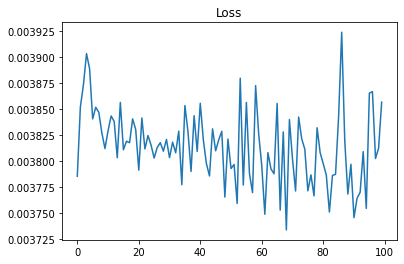

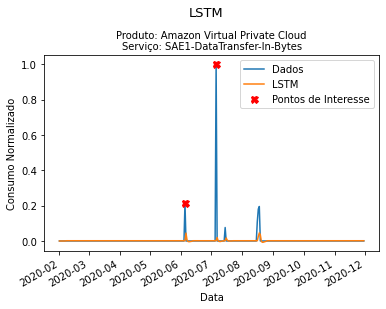

===  Amazon Virtual Private Cloud  /  SAE1-USW2-AWS-In-Bytes  ====
Series\serie_Amazon Virtual Private Cloud_SAE1-USW2-AWS-In-Bytes.csv
(304, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
297/297 [==============================] - 2s 6ms/step - loss: 0.0374 - mae: 0.1481
Epoch 2/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0308 - mae: 0.1327
Epoch 3/100
297/297 [=====================

297/297 [==============================] - 1s 4ms/step - loss: 0.0221 - mae: 0.1059
Epoch 77/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0214 - mae: 0.1071
Epoch 78/100
297/297 [==============================] - 1s 5ms/step - loss: 0.0206 - mae: 0.1051
Epoch 79/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0210 - mae: 0.1047
Epoch 80/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0203 - mae: 0.1029
Epoch 81/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0206 - mae: 0.1056
Epoch 82/100
297/297 [==============================] - 1s 3ms/step - loss: 0.0212 - mae: 0.1060
Epoch 83/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0205 - mae: 0.1033
Epoch 84/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0206 - mae: 0.1058
Epoch 85/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0201 - mae: 0.1053
Epoch 86/100
297/297 [=====================

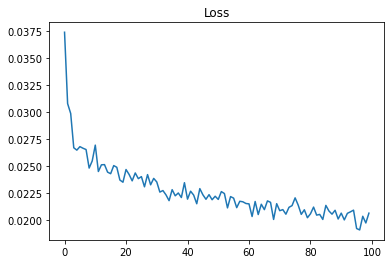

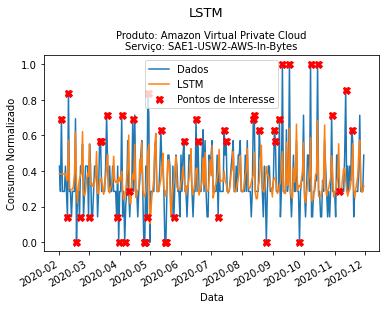

===  Amazon Virtual Private Cloud  /  SAE1-USE1-AWS-In-Bytes  ====
Series\serie_Amazon Virtual Private Cloud_SAE1-USE1-AWS-In-Bytes.csv
(298, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
291/291 [==============================] - 1s 5ms/step - loss: 0.0143 - mae: 0.0656
Epoch 2/100
291/291 [==============================] - 1s 4ms/step - loss: 0.0144 - mae: 0.0665
Epoch 3/100
291/291 [=====================

291/291 [==============================] - 1s 4ms/step - loss: 0.0105 - mae: 0.0536
Epoch 77/100
291/291 [==============================] - 1s 4ms/step - loss: 0.0112 - mae: 0.0563
Epoch 78/100
291/291 [==============================] - 1s 3ms/step - loss: 0.0105 - mae: 0.0561
Epoch 79/100
291/291 [==============================] - 1s 3ms/step - loss: 0.0106 - mae: 0.0560
Epoch 80/100
291/291 [==============================] - 1s 4ms/step - loss: 0.0107 - mae: 0.0560
Epoch 81/100
291/291 [==============================] - 1s 4ms/step - loss: 0.0110 - mae: 0.0581
Epoch 82/100
291/291 [==============================] - 1s 4ms/step - loss: 0.0110 - mae: 0.0564
Epoch 83/100
291/291 [==============================] - 1s 3ms/step - loss: 0.0107 - mae: 0.0546
Epoch 84/100
291/291 [==============================] - 1s 3ms/step - loss: 0.0108 - mae: 0.0556
Epoch 85/100
291/291 [==============================] - 1s 4ms/step - loss: 0.0104 - mae: 0.0553
Epoch 86/100
291/291 [=====================

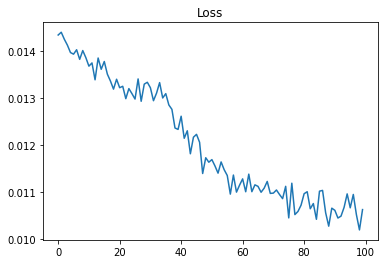

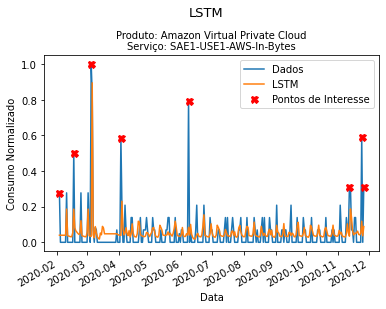

===  EC2 - Other  /  SAE1-DataTransfer-Regional-Bytes  ====
Series\serie_EC2 - Other_SAE1-DataTransfer-Regional-Bytes.csv
(269, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
262/262 [==============================] - 2s 6ms/step - loss: 0.0237 - mae: 0.0800
Epoch 2/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0124 - mae: 0.0648
Epoch 3/100
262/262 [==============================] - 1

262/262 [==============================] - 1s 3ms/step - loss: 0.0048 - mae: 0.0353
Epoch 77/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0050 - mae: 0.0359
Epoch 78/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0044 - mae: 0.0345
Epoch 79/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0043 - mae: 0.0339
Epoch 80/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0044 - mae: 0.0324
Epoch 81/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0038 - mae: 0.0309
Epoch 82/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0051 - mae: 0.0377
Epoch 83/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0049 - mae: 0.0357
Epoch 84/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0046 - mae: 0.0358
Epoch 85/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0052 - mae: 0.0368
Epoch 86/100
262/262 [=====================

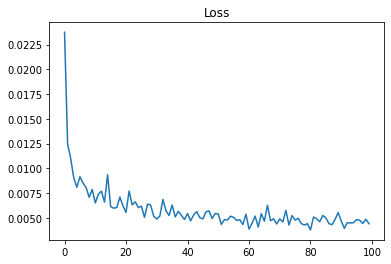

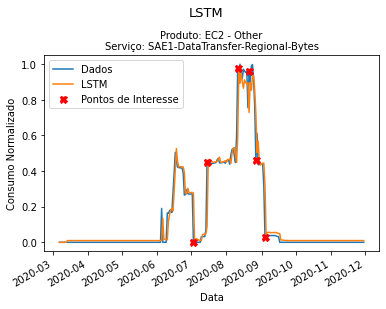

===  EC2 - Other  /  SAE1-EU-AWS-In-Bytes  ====
Series\serie_EC2 - Other_SAE1-EU-AWS-In-Bytes.csv
(270, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
263/263 [==============================] - 2s 6ms/step - loss: 0.0365 - mae: 0.1235
Epoch 2/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0196 - mae: 0.0814
Epoch 3/100
263/263 [==============================] - 1s 4ms/step - loss: 0.019

263/263 [==============================] - 1s 4ms/step - loss: 0.0120 - mae: 0.0623
Epoch 77/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0126 - mae: 0.0647
Epoch 78/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0611
Epoch 79/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0124 - mae: 0.0631
Epoch 80/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0128 - mae: 0.0621
Epoch 81/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0122 - mae: 0.0590
Epoch 82/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0113 - mae: 0.0593
Epoch 83/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0116 - mae: 0.0611
Epoch 84/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0113 - mae: 0.0567
Epoch 85/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0127 - mae: 0.0637
Epoch 86/100
263/263 [=====================

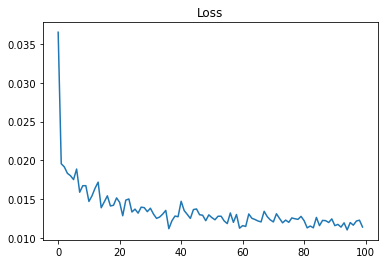

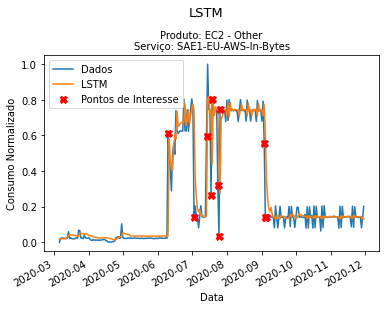

===  EC2 - Other  /  SAE1-NatGateway-Bytes  ====
Series\serie_EC2 - Other_SAE1-NatGateway-Bytes.csv
(270, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
263/263 [==============================] - 1s 5ms/step - loss: 0.0219 - mae: 0.0801
Epoch 2/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0184 - mae: 0.0644
Epoch 3/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0

263/263 [==============================] - 1s 3ms/step - loss: 0.0116 - mae: 0.0487
Epoch 77/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0115 - mae: 0.0472
Epoch 78/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0119 - mae: 0.0499
Epoch 79/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0112 - mae: 0.0454
Epoch 80/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0116 - mae: 0.0490
Epoch 81/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0113 - mae: 0.0495
Epoch 82/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0118 - mae: 0.0488
Epoch 83/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0116 - mae: 0.0480
Epoch 84/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0114 - mae: 0.0478
Epoch 85/100
263/263 [==============================] - 1s 3ms/step - loss: 0.0107 - mae: 0.0467
Epoch 86/100
263/263 [=====================

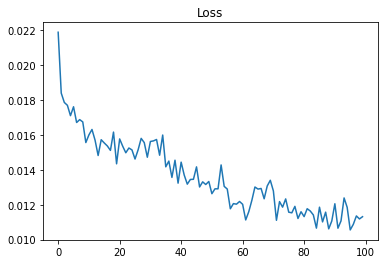

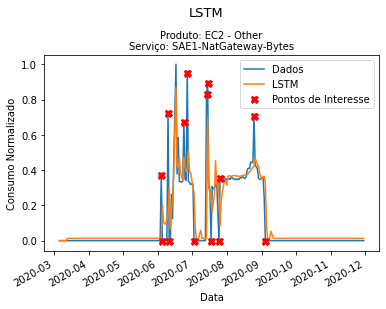

===  Amazon Simple Storage Service  /  Requests-Tier1  ====
Series\serie_Amazon Simple Storage Service_Requests-Tier1.csv
(300, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
293/293 [==============================] - 2s 6ms/step - loss: 0.0182 - mae: 0.0782
Epoch 2/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0103 - mae: 0.0589
Epoch 3/100
293/293 [==============================] - 1

293/293 [==============================] - 1s 4ms/step - loss: 0.0057 - mae: 0.0470
Epoch 76/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0051 - mae: 0.0447
Epoch 77/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0052 - mae: 0.0445
Epoch 78/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0056 - mae: 0.0465
Epoch 79/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0054 - mae: 0.0458
Epoch 80/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0060 - mae: 0.0491
Epoch 81/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0055 - mae: 0.0458
Epoch 82/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0059 - mae: 0.0475
Epoch 83/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0057 - mae: 0.0449
Epoch 84/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0054 - mae: 0.0435
Epoch 85/100
293/293 [=====================

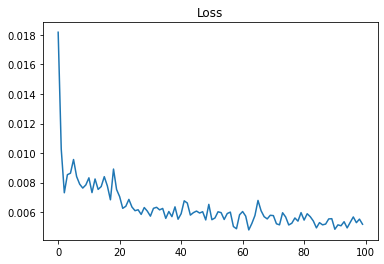

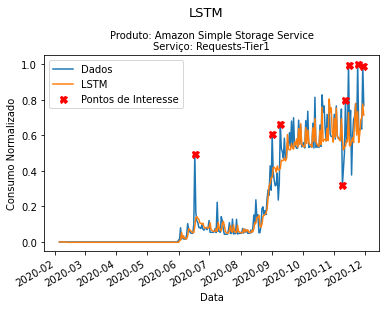

===  Amazon Simple Storage Service  /  Requests-Tier2  ====
Series\serie_Amazon Simple Storage Service_Requests-Tier2.csv
(300, 1)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
293/293 [==============================] - 1s 5ms/step - loss: 0.0074 - mae: 0.0446
Epoch 2/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0051 - mae: 0.0311
Epoch 3/100
293/293 [==============================] - 1

293/293 [==============================] - 1s 4ms/step - loss: 0.0036 - mae: 0.0267
Epoch 77/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0219
Epoch 78/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0031 - mae: 0.0229
Epoch 79/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0211
Epoch 80/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0242
Epoch 81/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0224
Epoch 82/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0034 - mae: 0.0241
Epoch 83/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0208
Epoch 84/100
293/293 [==============================] - 1s 3ms/step - loss: 0.0033 - mae: 0.0224
Epoch 85/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0224
Epoch 86/100
293/293 [=====================

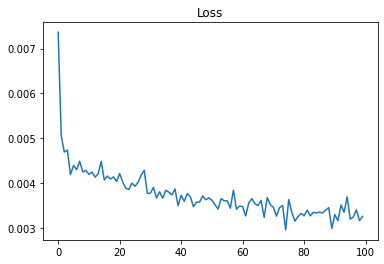

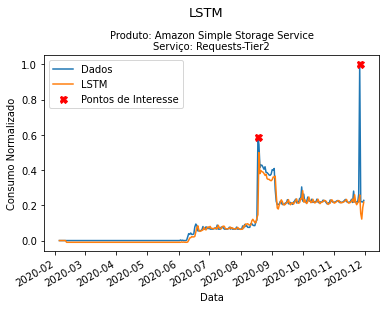

===  Amazon Simple Storage Service  /  SAE1-USE1-AWS-Out-Bytes  ====
Series\serie_Amazon Simple Storage Service_SAE1-USE1-AWS-Out-Bytes.csv
(300, 1)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_27 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
293/293 [==============================] - 2s 5ms/step - loss: 0.0087 - mae: 0.0459
Epoch 2/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0085 - mae: 0.0466
Epoch 3/100
293/293 [=================

293/293 [==============================] - 1s 4ms/step - loss: 0.0070 - mae: 0.0399
Epoch 76/100
293/293 [==============================] - 1s 5ms/step - loss: 0.0067 - mae: 0.0377
Epoch 77/100
293/293 [==============================] - 2s 5ms/step - loss: 0.0066 - mae: 0.0374
Epoch 78/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0067 - mae: 0.0382
Epoch 79/100
293/293 [==============================] - 2s 5ms/step - loss: 0.0067 - mae: 0.0384
Epoch 80/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0066 - mae: 0.0370
Epoch 81/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0065 - mae: 0.0371
Epoch 82/100
293/293 [==============================] - 1s 4ms/step - loss: 0.0068 - mae: 0.0371
Epoch 83/100
293/293 [==============================] - 1s 5ms/step - loss: 0.0066 - mae: 0.0396
Epoch 84/100
293/293 [==============================] - 1s 5ms/step - loss: 0.0066 - mae: 0.0369
Epoch 85/100
293/293 [=====================

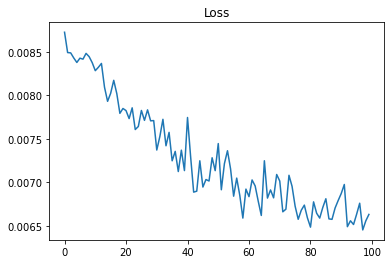

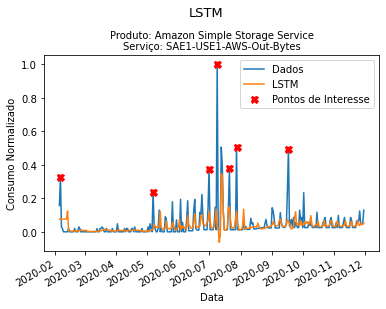

In [17]:
for key in nuvem:
    for value in nuvem[key]:
        produto = key
        servico = value
        print('=== ',produto,' / ', servico,' ====')
        ddo_lstm (produto, servico)

In [18]:
import winsound
duration = 1*600  # milliseconds
freq = 1040  # Hz
winsound.Beep(freq, duration)
winsound.Beep(freq, duration)
winsound.Beep(freq, duration)

In [19]:
import winsound
duration = 1*700  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)
winsound.Beep(freq, duration)
winsound.Beep(freq, duration)